# CHAPTER 5

# Section 1

Learning about how to fit generic mathematical functions in PyTorch, not just for neural networks.


In [9]:
import torch

In [10]:
# trying to calibrate a new thermometer

In [11]:
truth_celsius = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0] # celsius
x = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4] # unknown shit

In [13]:
truth_celsius = torch.tensor(truth_celsius)
x = torch.tensor(x)

type(truth_celsius), type(x)

/Users/ramanshsharma/miniconda/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.
/Users/ramanshsharma/miniconda/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


(torch.Tensor, torch.Tensor)

In [14]:
# testing a linear model

# celsius = w * x + b

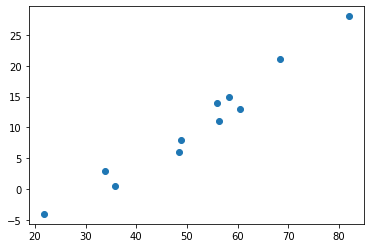

In [16]:
import matplotlib.pyplot as plt

plt.scatter(x, truth_celsius)

In [17]:
# a simple model

def model(data, w, b):
    return data * w + b

In [41]:
# loss function - mean squared difference is used because it is better to have a few slightly
# higher losses than a few really high ones, which mean squared error takes care of

def loss(y, y_pred):
    return torch.mean(torch.pow(y - y_pred, 2))

In [42]:
# initialize params

# we don't need to specify the shape of these params
# because while using multiplication with pytorch tensors, they will be broadcasted
w = torch.ones(())
b = torch.zeros(())

In [43]:
# forward pass

preds = model(x, w, b)
preds

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

In [44]:
loss_val = loss(preds, truth_celsius)
loss_val

tensor(1763.8846)

The hypothesis (forward pass) function is defined as:

$$
h(x) = \textit{w * x + b}
$$

To generalize the hypothesis to arbritrary parameters and inputs in a univariate linear regression, we derive:

$$
h_{\theta}(x) = \theta_0 \cdot x_0 + \theta_1 \cdot x_1
$$

Hence the loss function will be:

$$
\hat{L}_{(y, \hat{y})} = \frac{1}{2m} \sum_{i = 1}^{m}\, (y^{(i)} - \hat{y}^{(i)}) ^ 2 \qquad ,y^{(i)} = h_{\theta}(x^{(i)})
$$

Substituting the hypothesis function into the loss function:

$$
\hat{L}_{(\theta_0, \theta_1)} = \frac{1}{2m} \sum_{i = 1}^{m}\, (y^{(i)} - h_{\theta}(x^{(i)})) ^ 2 \qquad ,h_{\theta}(x) = \theta_0 \cdot x_0 + \theta_1 \cdot x_1
$$

__Note: The _2_ in the denominator of the loss function is placed there for convenience so that when the derivative of the loss function is taken, the _2's_ divide out and we are left with__ $\frac{1}{m}$__.__
__The $\frac{1}{m}$ is in the equation so that the loss function does not depend on the number of examples in the dataset, and its values are comparable across any dataset size.__

The derivative of the loss function with respect to its parameters according to the Chain rule will be:

$$
\frac{\partial}{\partial \theta_{0, 1}}\hat{L}(\theta_0, \theta_1) = 
\frac{\partial \hat{L}}{\partial h_{\theta}(x)} \times
\frac{\partial h_{\theta}(x)}{\partial \theta_{0, 1}}
$$

In [ ]:
def loss_h(preds, truth):
    derivative = 2 * (preds - truth) / 